In [1]:
import os, sys
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [2]:
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

In [3]:
x_train.shape, y_train.shape

((95757, 4), (95757, 2))

In [7]:
x_train.columns

Index(['Unnamed: 0', 'paymentRatio', 'FirstPaymentDefault',
       'clientGender_FEMALE'],
      dtype='object')

In [ ]:
x_train = x_train.drop('Unnamed: 0',axis = 1)
x_train.head()

In [9]:
x_test = x_test.drop('Unnamed: 0', axis = 1)
y_train = y_train.drop('Unnamed: 0', axis = 1)
y_test = y_test.drop('Unnamed: 0', axis = 1)

# logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [11]:
log.fit(x_train, y_train)
log.score(x_train, y_train)

0.8450243846402874

In [13]:
prediction = log.predict(x_test)
from sklearn.metrics import accuracy_score
test_score = accuracy_score(prediction, y_test)
test_score

0.84720938611193786

# Decision Tree

In [14]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 0)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [16]:
train_score = tree.score(x_train, y_train)
prediction = tree.predict(x_test)
from sklearn.metrics import accuracy_score
test_score = accuracy_score(prediction, y_test)
train_score, test_score

(0.8450243846402874, 0.84720938611193786)

# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [18]:
forest.score(x_train, y_train)

0.8450243846402874

In [19]:
prediction = forest.predict(x_test)
from sklearn.metrics import accuracy_score
test_score = accuracy_score(prediction, y_test)
test_score

0.84720938611193786

In [20]:
for i in [100,150,200,250]:
    tree = RandomForestClassifier(random_state = 0, n_estimators = i)
    tree.fit(x_train, y_train)
    train_score = tree.score(x_train, y_train)
    prediction = log.predict(x_test)
    from sklearn.metrics import accuracy_score
    test_score = accuracy_score(prediction, y_test)
    print(train_score, test_score)

0.84502438464 0.847209386112
0.84502438464 0.847209386112
0.84502438464 0.847209386112
0.84502438464 0.847209386112


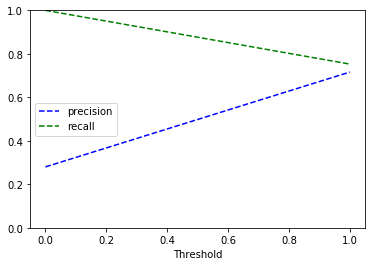

In [23]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, prediction)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc = 'center left')
    plt.ylim([0,1])
    plt.show()
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

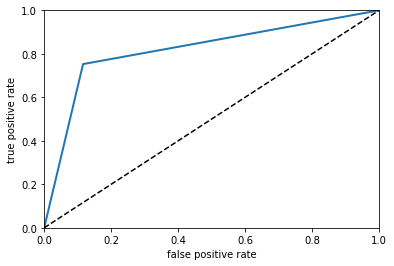

In [24]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, prediction)

def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth= 2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
plot_roc_curve(fpr, tpr, thresholds)
plt.show()

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, prediction)

0.81840804312228532

In [32]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prediction)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.81840804312228532

## N_estimators

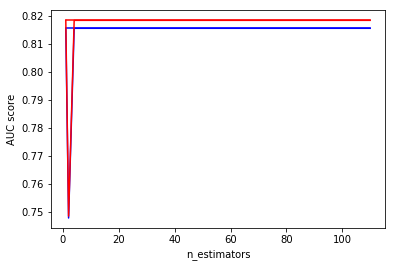

In [35]:
n_estimators = [1,2,4,8,20,30,50,70,90,110]
train_results = []
test_results = []

for estimator in n_estimators:
    forest = RandomForestClassifier(n_estimators = estimator, n_jobs =-1)
    forest.fit(x_train, y_train)
    
    
    train_pred = forest.predict(x_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = forest.predict(x_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    
from matplotlib.legend_handler import HandlerLine2D

line1 = plt.plot(n_estimators, train_results, 'b', label = 'Train AUC')
line2 = plt.plot(n_estimators, test_results, 'r', label = 'Test AUC')

#plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})

plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

## Max_depth

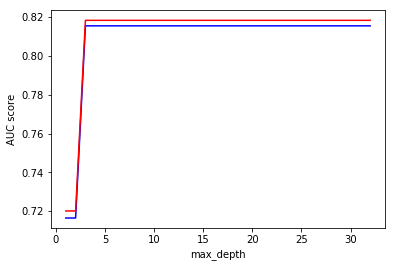

In [45]:
max_depths = np.linspace(1,32,32, endpoint = True)
train_results = []
test_results = []

for max_depth in max_depths:
    forest = RandomForestClassifier(max_depth = max_depth, n_jobs =-1)
    forest.fit(x_train, y_train)
    
    
    train_pred = forest.predict(x_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = forest.predict(x_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    
from matplotlib.legend_handler import HandlerLine2D

line1 = plt.plot(max_depths, train_results, 'b', label = 'Train AUC')
line2 = plt.plot(max_depths, test_results, 'r', label = 'Test AUC')

#plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})

plt.ylabel('AUC score')
plt.xlabel('max_depth')
plt.show()

## min_samples_split

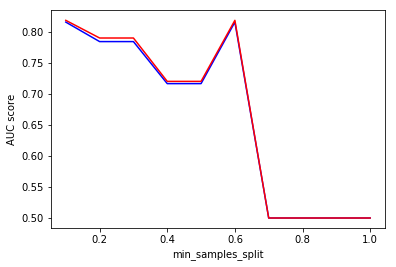

In [46]:
min_samples_splits = np.linspace(0.1, 1.0,10,endpoint = True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    forest = RandomForestClassifier(min_samples_split = min_samples_split,n_jobs =-1)
    forest.fit(x_train, y_train)
    
    
    train_pred = forest.predict(x_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = forest.predict(x_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    
from matplotlib.legend_handler import HandlerLine2D

line1 = plt.plot(min_samples_splits, train_results, 'b', label = 'Train AUC')
line2 = plt.plot(min_samples_splits, test_results, 'r', label = 'Test AUC')

#plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})

plt.ylabel('AUC score')
plt.xlabel('min_samples_split')
plt.show()

## min samples leaf

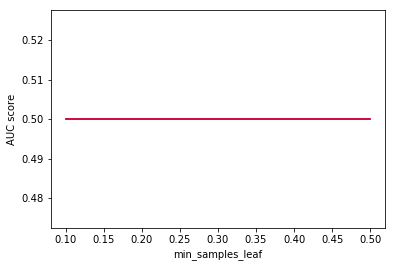

In [47]:
min_samples_leafs = np.linspace(0.1, 0.5,5,endpoint = True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    forest = RandomForestClassifier(min_samples_leaf = min_samples_leaf,
                                    n_jobs =-1)
    forest.fit(x_train, y_train)
    
    
    train_pred = forest.predict(x_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = forest.predict(x_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    
from matplotlib.legend_handler import HandlerLine2D

line1 = plt.plot(min_samples_leafs, train_results, 'b', label = 'Train AUC')
line2 = plt.plot(min_samples_leafs, test_results, 'r', label = 'Test AUC')

#plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})

plt.ylabel('AUC score')
plt.xlabel('min_samples_leaf')
plt.show()

## max_features

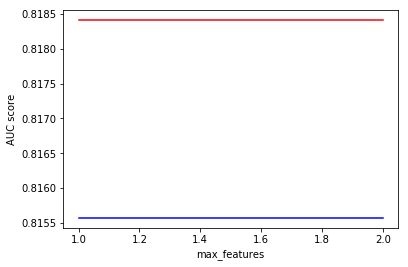

In [48]:
max_features = list(range(1,x_train.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
    forest = RandomForestClassifier(max_features = max_feature,
                                    n_jobs =-1)
    forest.fit(x_train, y_train)
    
    
    train_pred = forest.predict(x_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = forest.predict(x_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    
from matplotlib.legend_handler import HandlerLine2D

line1 = plt.plot(max_features, train_results, 'b', label = 'Train AUC')
line2 = plt.plot(max_features, test_results, 'r', label = 'Test AUC')

#plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})

plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.show()

## final evaluation of random forest

In [49]:
forest = RandomForestClassifier(min_samples_leaf = 0.5,max_features = 1,
                                    n_estimators = 10, min_samples_split = 0.1,
                                    max_depth = 5, n_jobs =-1)
forest.fit(x_train,y_train)
train = forest.score(x_train, y_train)

prediction = forest.predict(x_test)
from sklearn.metrics import accuracy_score
test_score = accuracy_score(prediction, y_test)
train, test_score

(0.72023977359357538, 0.71990476041291374)

In [30]:
from sklearn.cross_validation import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
#cross_val_score(forest, x_train, y_train, cv = 10, scoring = 'accuracy')
y_train_pred = cross_val_predict(forest, x_train, y_train, cv =3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

IndexError: too many indices for array

In [ ]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()